# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [80]:
import pandas as pd
import numpy as np
import random

In [81]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [84]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [86]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [87]:
# parameter 개수
N = len(X_train.loc[0])

In [88]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.29795912, 0.28722711, 0.59803203])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [89]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i]*parameters[i]
    return z

## Logistic Function

## $p = 1/(1+e^{-X_i^{T} \theta})$

In [90]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1/(1+np.exp(-z))    
    return p

In [91]:
logistic(X_train.iloc[1], parameters)

0.6603335162801135

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma{(y_ilogp(X_i) + (1-y_i)log(1-p(X_i)))}$

In [117]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X,parameters)
    loss = -(y*np.log(p) + (1-y)*np.log(1-p))
    return loss

In [118]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X,parameters.T)
    loss = np.square(y-y_hat)/2
    return loss

In [120]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y,parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [121]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

1.011069262880481

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-\Sigma(y_i - \theta^{T}X_i)X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)=-\Sigma(y_i - p_i)x_{ij}$

In [122]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X,parameters.T)
        gradient = -(y - y_hat)*X[j]
    else:
        p = logistic(X, parameters)
        gradient = -(y - p)*X[j]
    return gradient

In [123]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.10939190643922052

In [99]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [102]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [103]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[-42.2927020429135, -5.810651812875923, -40.16580255330645]

## mini-batch
인덱스로 미니 배치 나누기

In [104]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: X_train 길이 N을 배치 사이즈로 나누고, [[0,1, ..., 배치 사이즈-1],[배치 사이즈, 배치 사이즈+1, ... 2*배치 사이즈 -1],...] 이런 식으로 구성됨

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [139]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate/n
    parameters -= gradients
    return parameters

In [116]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.29795912, 0.28722711, 0.59803203])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 학습 횟수 
- num_epoch: 에폭 수
<br>

BGD: 학습 한 번에 모든 데이터셋을 사용해 기울기 업데이트  
SGD: 학습 한 번에 임의의 1개의 데이터를 사용해 기울기 업데이트
MGD: 학습 한 번에 데이터셋의 일부만 사용해 기울기 업데이트
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD  
batch_size=k -> MGD  
batch_size=whole -> BGD  

In [124]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, batch_size)
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, batch_size)
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [126]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=len(X_train))
new_param_bgd

epoch: 0  loss: 1.1776721938912338  params: [9.54225391e-01 7.61401589e-04 9.17540493e-01]  gradients: [0.04170261193900461, 0.00022471359404945365, 0.025902859469268798]
epoch: 100  loss: 0.49442532247820065  params: [-0.75410086  0.59793846 -0.51461423]  gradients: [0.004652656971536333, -0.007437147960261723, 0.007881634006173402]
epoch: 200  loss: 0.4098545237988103  params: [-0.99706067  1.21698451 -1.13652047]  gradients: [0.00139217039700598, -0.005117407863591112, 0.005029693838235883]
epoch: 300  loss: 0.3712192805772594  params: [-1.10797936  1.65266549 -1.56258731]  gradients: [0.0009350258156884668, -0.003734359199765489, 0.0036354018414161715]
epoch: 400  loss: 0.3495619968752026  params: [-1.1919732   1.98049687 -1.88060867]  gradients: [0.0007618524089487654, -0.002893352008504841, 0.0027968961106907123]
epoch: 500  loss: 0.33605164494360246  params: [-1.2619042   2.23993527 -2.13066887]  gradients: [0.0006433364812955188, -0.002335522092328968, 0.002244632998120385]
epo

array([-1.49017594,  3.03057985, -2.88377355])

In [127]:
new_param_sgd = gradient_descent(X_train, y_train, 1)
new_param_sgd

epoch: 0  loss: 0.1385123241204747  params: [-0.86301343  0.92820181 -1.00925332]  gradients: [0.05966750691920418, 0.06415485069667434, 0.09952140023696188]
epoch: 100  loss: 0.05880390047946893  params: [-1.9151023   4.20414293 -4.04593054]  gradients: [0.031173183611747046, 0.04645331958705397, 0.05281201175805373]
epoch: 200  loss: 0.05875730201710625  params: [-1.91640883  4.20813593 -4.04958067]  gradients: [0.031166864002603843, 0.04644729330164099, 0.052788315160122425]
epoch: 300  loss: 0.05875717840580671  params: [-1.9164123   4.20814653 -4.04959036]  gradients: [0.03116684726423617, 0.04644727733031814, 0.052788252311442595]
epoch: 400  loss: 0.058757178077283784  params: [-1.91641231  4.20814656 -4.04959039]  gradients: [0.03116684721975068, 0.04644727728787118, 0.05278825214440919]
epoch: 500  loss: 0.05875717807641062  params: [-1.91641231  4.20814656 -4.04959039]  gradients: [0.031166847219632428, 0.04644727728775835, 0.05278825214396523]
epoch: 600  loss: 0.05875717807

array([-1.91641231,  4.20814656, -4.04959039])

In [129]:
new_param_mgd = gradient_descent(X_train, y_train, 100)
new_param_mgd

C:\Users\luklu\AppData\Local\Temp\ipykernel_24140\939319315.py:3: RuntimeWarning: divide by zero encountered in log
  loss = -(y*np.log(p) + (1-y)*np.log(1-p))
C:\Users\luklu\AppData\Local\Temp\ipykernel_24140\939319315.py:3: RuntimeWarning: invalid value encountered in multiply
  loss = -(y*np.log(p) + (1-y)*np.log(1-p))


epoch: 0  loss: 1.038425064713458  params: [-37.06470637  26.28398634 -27.28924979]  gradients: [12.527735962065245, 17.736949524995914, 15.851655235249783]
epoch: 100  loss: 1.1636301019332276  params: [-40.28461972  27.55772834 -31.17700238]  gradients: [12.372952842921599, 17.609329400678984, 15.763051915979515]
epoch: 200  loss: 0.5479936198234262  params: [-41.74247994  42.83436503 -40.47063978]  gradients: [8.06116761179475, 13.244076998403687, 12.098403474266012]
epoch: 300  loss: 0.629581373565179  params: [-35.71187768  33.07026462 -33.29741861]  gradients: [5.264375173255405, 10.752456627317597, 10.700176315654812]
epoch: 400  loss: 0.873477171469131  params: [-40.79363033  34.14151193 -38.3427059 ]  gradients: [12.45754258045973, 17.671866221787145, 15.768399292470619]
epoch: 500  loss: 1.0867775872435532  params: [-40.38930337  29.25255751 -33.11499067]  gradients: [12.429137753995729, 17.649257772205377, 15.76197040484236]
epoch: 600  loss: 0.6283403705180567  params: [-45

array([-40.49309019,  28.51685822, -32.08852244])

### Predict Label

In [130]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [131]:
from sklearn.metrics import *

In [132]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]], dtype=int64)

In [133]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [134]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [135]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [136]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.4404184 , 2.95097048])

In [141]:
#경사하강법
new_param = gradient_descent(X, y, model='linear')
new_param

epoch: 0  loss: 0.1475469015846352  params: [1.50767899 0.47901018]  gradients: [0.02145906379425698, 0.009620548409471096]
epoch: 100  loss: 0.2143644563238174  params: [0.4582099  2.94881231]  gradients: [0.013500145463439708, 0.01054482818686329]
epoch: 200  loss: 0.21480812003023703  params: [0.45108515 2.96197687]  gradients: [0.013397805200089536, 0.010529227787238485]
epoch: 300  loss: 0.21481062018252273  params: [0.45104524 2.96205062]  gradients: [0.01339723182465773, 0.010529140383849256]
epoch: 400  loss: 0.21481063419042462  params: [0.45104501 2.96205104]  gradients: [0.013397228612242846, 0.010529139894159718]
epoch: 500  loss: 0.21481063426890581  params: [0.45104501 2.96205104]  gradients: [0.013397228594244866, 0.010529139891416172]
epoch: 600  loss: 0.2148106342693456  params: [0.45104501 2.96205104]  gradients: [0.01339722859414399, 0.010529139891400793]
epoch: 700  loss: 0.21481063426934785  params: [0.45104501 2.96205104]  gradients: [0.01339722859414348, 0.010529

array([0.45104501, 2.96205104])

In [142]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

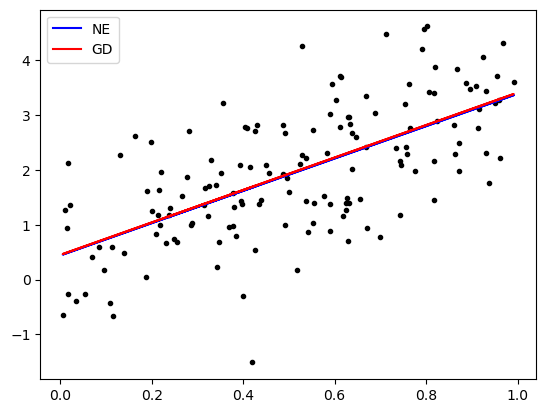

In [143]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()